# **기본 셋팅**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
# 고객 데모 정보
df01 = pd.read_csv('/content/drive/Shareddrives/다빈치/LPOINT_BIG_COMP/LPOINT_BIG_COMP_01_DEMO.csv')

# 상품 구매 정보 (유통사 상품 구매 내역)
df02 = pd.read_csv('/content/drive/Shareddrives/다빈치/LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv') 

# 제휴사 이용 정보 (제휴사 서비스 이용 내역)
df03 = pd.read_csv('/content/drive/Shareddrives/다빈치/LPOINT_BIG_COMP/LPOINT_BIG_COMP_03_COP_U.csv') 

# 상품 분류 정보 (유통사 상품 카테고리 마스터)
df04 = pd.read_csv('/content/drive/Shareddrives/다빈치/LPOINT_BIG_COMP/LPOINT_BIG_COMP_04_PD_CLAC.csv') 

# 점포 정보 (유통사/제휴사 점포 마스터)
df05 = pd.read_csv('/content/drive/Shareddrives/다빈치/LPOINT_BIG_COMP/LPOINT_BIG_COMP_05_BR.csv') 

# 엘페이 이용 (엘페이 결제 내역)
df06 = pd.read_csv('/content/drive/Shareddrives/다빈치/LPOINT_BIG_COMP/LPOINT_BIG_COMP_06_LPAY.csv') 


NameError: ignored

# **고객 데모 정보 EDA**

In [ ]:
df01 = df01.copy()

In [ ]:
df01.head()

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


In [ ]:
df01.shape

(29913, 4)

In [ ]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29913 entries, 0 to 29912
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cust       29913 non-null  object
 1   ma_fem_dv  29913 non-null  object
 2   ages       29913 non-null  object
 3   zon_hlv    29913 non-null  object
dtypes: object(4)
memory usage: 934.9+ KB


In [ ]:
df01.describe()

,cust,ma_fem_dv,ages,zon_hlv
count,29913,29913,29913,29913
unique,29913,2,6,17
top,M000034966,여성,40대,Z10
freq,1,20083,9863,8157


In [ ]:
print(df01['cust'].value_counts())
print(df01['ma_fem_dv'].value_counts())
print(df01['ages'].value_counts())
print(df01['zon_hlv'].value_counts())

M000034966    1
M665692049    1
M665923649    1
M665914455    1
M665900029    1
             ..
M331473499    1
M331468207    1
M331453096    1
M331445698    1
M999962961    1
Name: cust, Length: 29913, dtype: int64
여성    20083
남성     9830
Name: ma_fem_dv, dtype: int64
40대    9863
30대    7736
50대    5633
20대    3853
60대    2115
70대     713
Name: ages, dtype: int64
Z10    8157
Z17    7881
Z16    2503
Z11    1840
Z04    1750
Z06    1080
Z14     988
Z13     896
Z12     803
Z08     739
Z15     677
Z09     642
Z03     600
Z05     576
Z01     474
Z07     204
Z02     103
Name: zon_hlv, dtype: int64


In [ ]:
codes, uniques = pd.factorize(df01['ma_fem_dv'], sort=True)
df01['ma_fem_dv'] = codes

df01['ma_fem_dv']

0        1
1        1
2        1
3        1
4        1
        ..
29908    1
29909    1
29910    1
29911    0
29912    1
Name: ma_fem_dv, Length: 29913, dtype: int64

In [ ]:
codes, uniques = pd.factorize(df01['ages'], sort=True)
df01['ages'] = codes

df01['ages']

0        2
1        1
2        1
3        3
4        2
        ..
29908    2
29909    1
29910    0
29911    1
29912    3
Name: ages, Length: 29913, dtype: int64

In [ ]:
codes, uniques = pd.factorize(df01['zon_hlv'], sort=True)
df01['zon_hlv'] = codes

df01['zon_hlv']

0         6
1        11
2        10
3        16
4        16
         ..
29908     9
29909    15
29910     3
29911     7
29912    16
Name: zon_hlv, Length: 29913, dtype: int64

In [ ]:
df01.corr()

,ma_fem_dv,ages,zon_hlv
ma_fem_dv,1.0,0.0,-0.0
ages,0.0,1.0,0.0
zon_hlv,-0.0,0.0,1.0


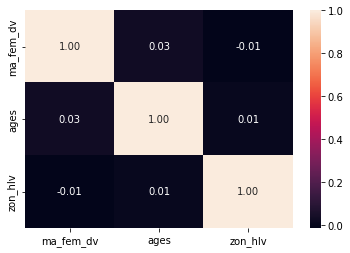

In [ ]:
sns.heatmap(df01.corr(), annot = True, fmt = ".2f")

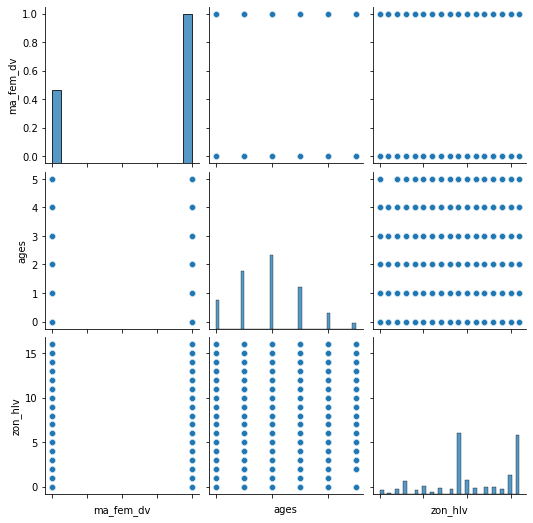

In [ ]:
g = sns.pairplot(df01)
g.set(xticklabels=[])

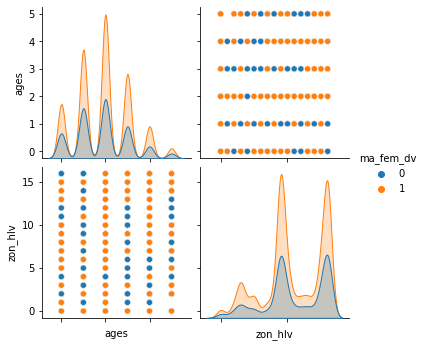

In [ ]:
g = sns.pairplot(df01, hue = 'ma_fem_dv')
g.set(xticklabels=[])

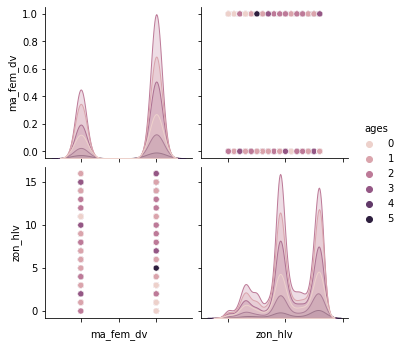

In [ ]:
g = sns.pairplot(df01, hue = 'ages')
g.set(xticklabels=[])

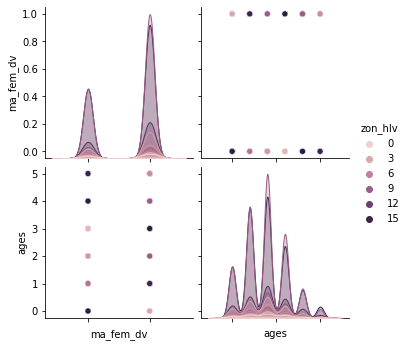

In [ ]:
g = sns.pairplot(df01, hue = 'zon_hlv')
g.set(xticklabels=[])

# **상품 구매 정보 (유통사 상품 구매 내역) EDA**

In [ ]:
df02 = df02.copy()

In [ ]:
df02.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [ ]:
df02.tail()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,cop_c_copy
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,5
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,5
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,5
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,5
4381742,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,5


In [ ]:
print(df02['chnl_dv'].value_counts())
print(df02['cop_c'].value_counts())

1    3953242
2     428501
Name: chnl_dv, dtype: int64
A02    2374970
A03     905691
A01     700350
A04     316401
A06      76160
A05       8171
Name: cop_c, dtype: int64


In [ ]:
df02[['chnl_dv', 'buy_am']].groupby('chnl_dv').sum().sort_values('buy_am')

,buy_am
chnl_dv,
2,7003280033.0
1,94708094364.0


In [ ]:
df02[['chnl_dv', 'buy_ct']].groupby('chnl_dv').sum().sort_values('buy_ct')

,buy_ct
chnl_dv,
2,558318
1,5183344


In [ ]:
df02[['cop_c', 'buy_am']].groupby('cop_c').mean().sort_values('buy_am')

,buy_am
cop_c,
A04,3296.7
A03,4091.2
A02,6838.1
A06,49921.9
A01,105997.8
A05,328609.3


In [ ]:
df02[['cop_c', 'buy_ct']].groupby('cop_c').sum().sort_values('buy_ct')

,buy_ct
cop_c,
A05,10782
A06,94507
A04,452224
A01,776213
A03,1178859
A02,3229077


In [ ]:
tmp1 = df02[['cop_c', 'buy_am']].groupby('cop_c').mean().sort_values('cop_c')
tmp2 = df02[['cop_c', 'buy_ct']].groupby('cop_c').sum().sort_values('cop_c')

pd.concat([tmp1,tmp2],axis=1).sort_values('buy_am')

,buy_am,buy_ct
cop_c,,
A04,3296.7,452224
A03,4091.2,1178859
A02,6838.1,3229077
A06,49921.9,94507
A01,105997.8,776213
A05,328609.3,10782


In [ ]:
print(df02[df02['cop_c'] == 'A01']['chnl_dv'].value_counts()) # 롯데백화점 ?
print(df02[df02['cop_c'] == 'A02']['chnl_dv'].value_counts()) # 롯데 마트? 롯데슈퍼?
print(df02[df02['cop_c'] == 'A03']['chnl_dv'].value_counts()) # 롯데 마트? 롯데슈퍼?
print(df02[df02['cop_c'] == 'A04']['chnl_dv'].value_counts()) # 세븐 일레븐 ?
print(df02[df02['cop_c'] == 'A05']['chnl_dv'].value_counts()) # 하이마트 ?
print(df02[df02['cop_c'] == 'A06']['chnl_dv'].value_counts()) # 롯데 홈쇼핑 ? 롯데 온?

1    694106
2      6244
Name: chnl_dv, dtype: int64
1    2144889
2     230081
Name: chnl_dv, dtype: int64
1    790812
2    114879
Name: chnl_dv, dtype: int64
1    316401
Name: chnl_dv, dtype: int64
1    7034
2    1137
Name: chnl_dv, dtype: int64
2    76160
Name: chnl_dv, dtype: int64


In [ ]:
df02['cop_c_copy'] = df02['cop_c'].copy()

codes, uniques = pd.factorize(df02['cop_c_copy'], sort=True)
df02['cop_c_copy'] = codes

df02[['chnl_dv', 'cop_c_copy']].corr()

,chnl_dv,cop_c_copy
chnl_dv,1.000000,0.247889
cop_c_copy,0.247889,1.000000


In [ ]:
df02.corr()

,chnl_dv,de_dt,de_hr,buy_am,buy_ct,cop_c_copy
chnl_dv,1.000000,-0.204367,-0.177461,-0.009840,-0.001527,0.247889
de_dt,-0.204367,1.000000,0.022086,0.008616,0.000443,-0.024349
de_hr,-0.177461,0.022086,1.000000,-0.014492,-0.004942,-0.031356
buy_am,-0.009840,0.008616,-0.014492,1.000000,0.008029,-0.076545
buy_ct,-0.001527,0.000443,-0.004942,0.008029,1.000000,0.028650
cop_c_copy,0.247889,-0.024349,-0.031356,-0.076545,0.028650,1.000000


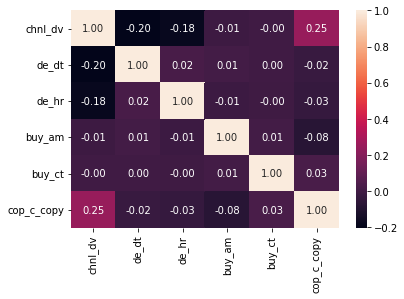

In [ ]:
sns.heatmap(df02.corr(), annot = True, fmt = ".2f")

고객 구매 데이터 기반 예측 모델 개발 및 개인화 마케팅 전략



랜덤 포레스트 분류 -> 특징 군집화 -> 마케팅





# **제휴사 이용 정보 (제휴사 서비스 이용 내역) EDA**

In [ ]:
df03 = df03.copy()

In [ ]:
df03.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


# **상품 분류 정보 (유통사 상품 카테고리 마스터) EDA**

In [ ]:
df04 = df04.copy()

In [ ]:
df04.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


In [ ]:
df04['clac_hlv_nm'].value_counts()

패션잡화          130
축산물            91
수산물            88
스포츠패션          82
문구/사무용품        72
채소             72
유아동의류          67
과일             58
속옷/양말/홈웨어      56
조미료            51
화장품/뷰티케어       50
생활/주방가전        43
퍼스널케어          39
원예/애완          39
구기/필드스포츠       38
조리식품           38
식기/조리기구        36
과자             36
침구/수예          35
자동차용품          35
아웃도어/레저        34
건강식품           32
출산/육아용품        32
냉장식품           32
주방잡화           32
가구             31
완구             31
건해산물           30
청소/세탁/욕실용품     30
여성의류           29
대용식            29
세제/위생          28
영상/음향가전        27
남성의류           26
건강용품           25
음료             24
테넌트/음식점        22
주류             22
시즌스포츠          22
인테리어/조명        21
커피/차           20
냉동식품           20
헬스/피트니스        15
양곡             15
서적/음반/악기       15
공구/안전용품        15
계절가전           15
컴퓨터            14
병통조림           14
생활/렌탈서비스       13
냉장/세탁가전        12
상품권            10
유제품             9
기타(비상품)         7
담배              6
여행/레저서비스  

# **점포 정보 (유통사/제휴사 점포 마스터) EDA**

In [ ]:
df05 = df05.copy()

In [ ]:
df05.head()

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005


# **엘페이 이용 (엘페이 결제 내역) EDA**

In [ ]:
df06 = df06.copy()

In [ ]:
df06.head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500


In [ ]:
# 엘페이 이용자 수
df06['cust'].drop_duplicates().shape[0]

8906

In [ ]:
# 전체 고객 중에 엘페이 이용자 비율
df06['cust'].drop_duplicates().shape[0] / df01.shape[0] * 100

29.773008391000566

In [ ]:
df02[['rct_no', 'chnl_dv']]

,rct_no,chnl_dv
0,A01000001113,1
1,A01000002265,1
2,A01000003148,1
3,A01000003148,1
4,A01000004946,1
...,...,...
4381738,E06052119978,2
4381739,E06052119978,2
4381740,E06052119978,2
4381741,E06052119978,2


In [ ]:
df06[['rct_no']]

,rct_no
0,210803210311226
1,210803130167542
2,210803140275112
3,210803040637594
4,210803140675502
...,...
353179,210125110644545
353180,210104210652271
353181,210119200278240
353182,210119180267206


# **비고**